In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline


In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [11]:
from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.5.0


In [12]:
img_size = 48
batch_size = 64
dir="C:\\Users\\rayudu sushma\\Downloads\\FacialExpressionRecognitionwithCNNsmaster\\FacialExpressionRecognitionwithCNNsmaster"
# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(dir+"/train/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory(dir+"/test/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [15]:
epochs = 50
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("C:\\Users\\rayudu sushma\\3.2 project\\model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

Epoch 1/50
448/448 [==============================] - 1149s 3s/step - loss: 1.7994 - accuracy: 0.3078 - val_loss: 1.6663 - val_accuracy: 0.3486

Epoch 00001: saving model to C:\Users\rayudu sushma\3.2 project\model_weights.h5
Epoch 2/50
448/448 [==============================] - 1328s 3s/step - loss: 1.4732 - accuracy: 0.4339 - val_loss: 1.5357 - val_accuracy: 0.4357

Epoch 00002: saving model to C:\Users\rayudu sushma\3.2 project\model_weights.h5
Epoch 3/50
448/448 [==============================] - 1344s 3s/step - loss: 1.3302 - accuracy: 0.4918 - val_loss: 1.3718 - val_accuracy: 0.4848

Epoch 00003: saving model to C:\Users\rayudu sushma\3.2 project\model_weights.h5
Epoch 4/50
448/448 [==============================] - 1251s 3s/step - loss: 1.2459 - accuracy: 0.5249 - val_loss: 1.2198 - val_accuracy: 0.5310

Epoch 00004: saving model to C:\Users\rayudu sushma\3.2 project\model_weights.h5
Epoch 5/50
448/448 [==============================] - 1178s 3s/step - loss: 1.1890 - accuracy: 0

In [16]:
model_json = model.to_json()
with open("C:\\Users\\rayudu sushma\\3.2 project\\model.json","w") as json_file:
    json_file.write(model_json)

In [17]:
model.save("model.h5")

<function matplotlib.pyplot.show(close=None, block=None)>

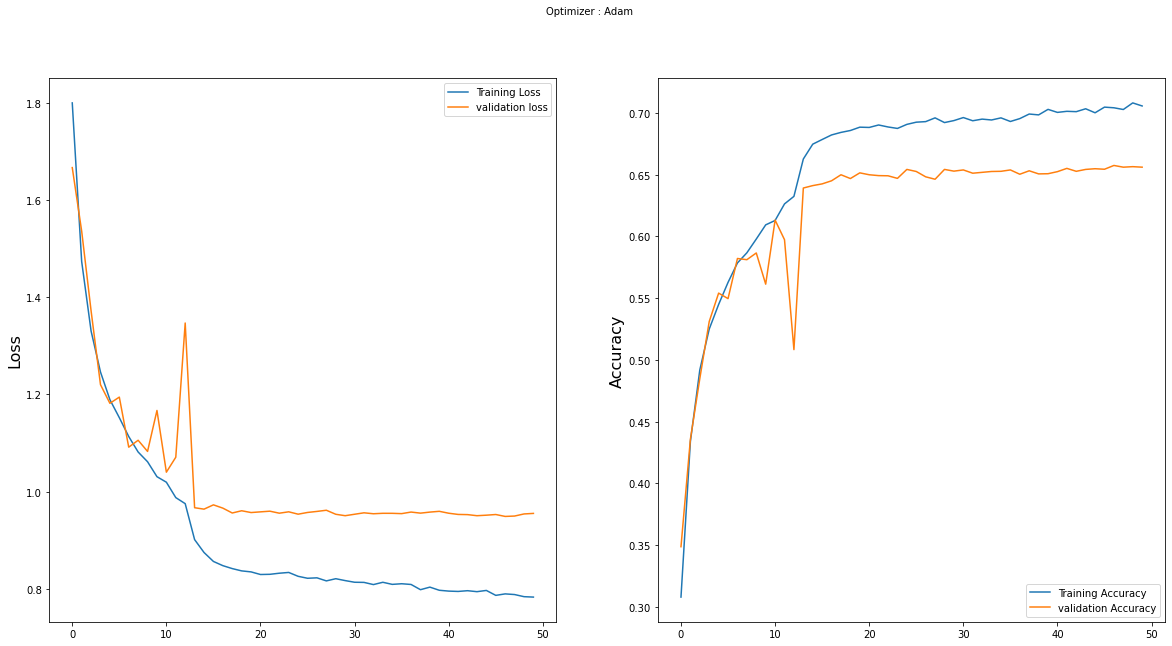

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle("Optimizer : Adam" , fontsize=10)
plt.ylabel("Loss" ,fontsize=16)
plt.plot(history.history['loss'] ,label = 'Training Loss')
plt.plot(history.history['val_loss'] ,label='validation loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel("Accuracy" ,fontsize=16)
plt.plot(history.history['accuracy'] ,label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'] ,label='validation Accuracy')
plt.legend(loc='lower right')

plt.show

